In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [7]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
data.shape

(30, 17)

In [9]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


##### This data set related to Baseball Case Study. 
##### It hase 17 columns and 30 row. 
##### There is no null values present. 
##### All columns has int64 data type except ERA column. ERA have float64 data type.

In [12]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: W ==== 24
Column: R ==== 28
Column: AB ==== 29
Column: H ==== 29
Column: 2B ==== 22
Column: 3B ==== 23
Column: HR ==== 27
Column: BB ==== 29
Column: SO ==== 29
Column: SB ==== 27
Column: RA ==== 30
Column: ER ==== 30
Column: ERA ==== 30
Column: CG ==== 9
Column: SHO ==== 12
Column: SV ==== 20
Column: E ==== 21


##### All columns have continuous data set.

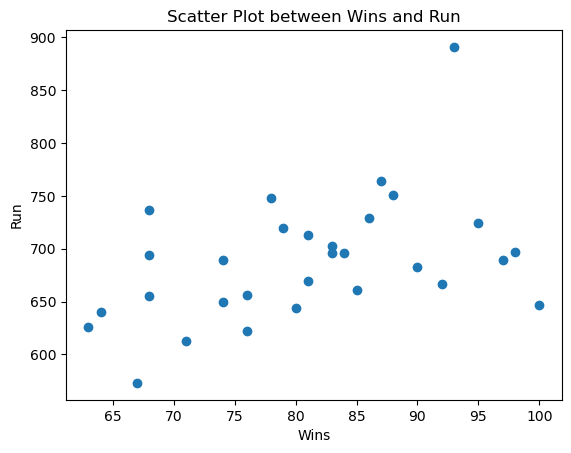

In [13]:
plt.scatter(data['W'], data['R'])
plt.title('Scatter Plot between Wins and Run')
plt.xlabel('Wins')
plt.ylabel('Run')
plt.show()


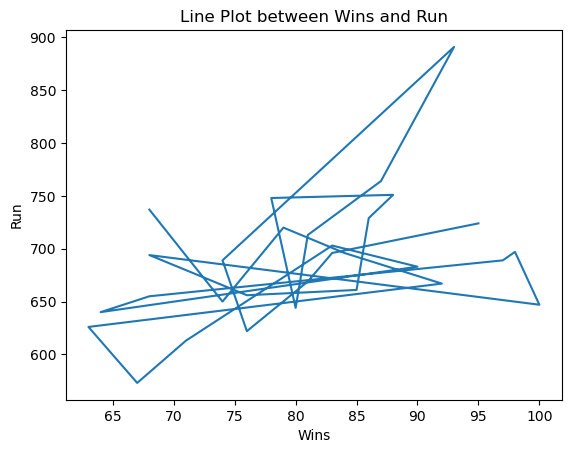

In [14]:
plt.plot(data['W'], data['R'])
plt.xlabel('Wins')
plt.ylabel('Run')
plt.title('Line Plot between Wins and Run')
plt.show()


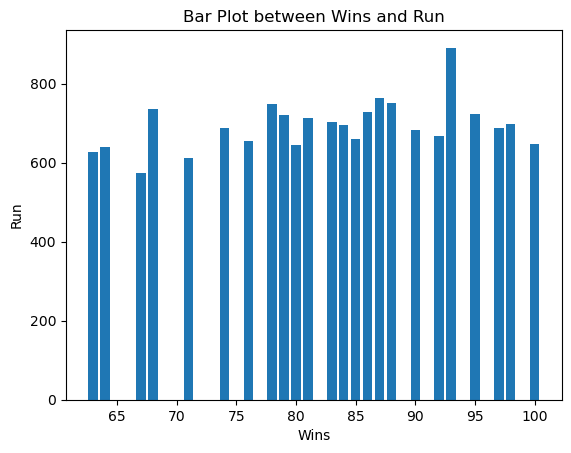

In [15]:
plt.bar(data['W'], data['R'])
plt.xlabel('Wins')
plt.ylabel('Run')
plt.title('Bar Plot between Wins and Run')
plt.show()

###### There doesn't seem to be a very good relationship between wins and runs.   Because even if the run is around 630 the chance of winning are only 60 time. And if we look at the last point of the graph, the runs in it are approx 620 and the number of wins is 100. So I don't think there is a very good relationship between runs and wins, but we will try to explore it in more ways.

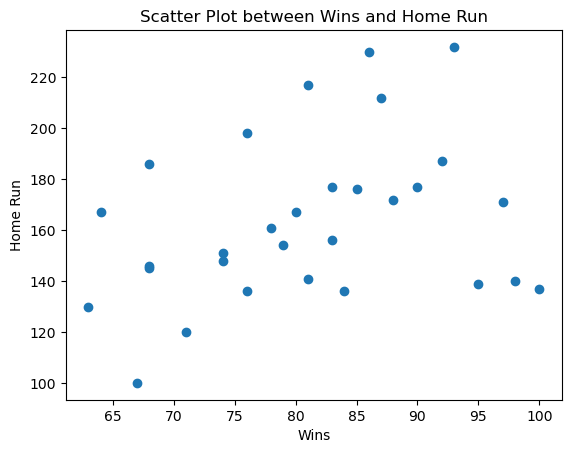

In [16]:
plt.scatter(data['W'], data['HR'])
plt.title('Scatter Plot between Wins and Home Run')
plt.xlabel('Wins')
plt.ylabel('Home Run')
plt.show()

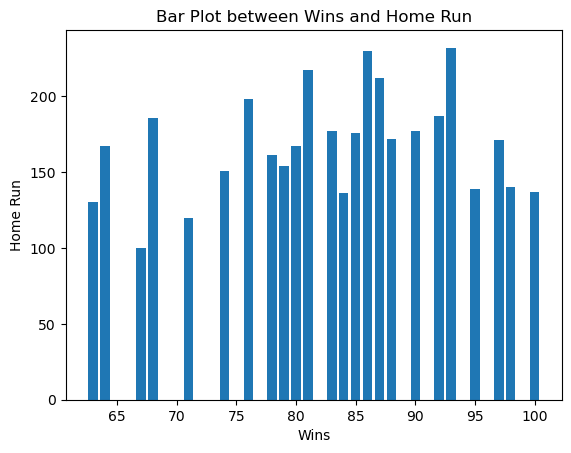

In [17]:
plt.bar(data['W'], data['HR'])
plt.title('Bar Plot between Wins and Home Run')
plt.xlabel('Wins')
plt.ylabel('Home Run')
plt.show()

###### This too is not a very good relationship but still some positive results are visible. 

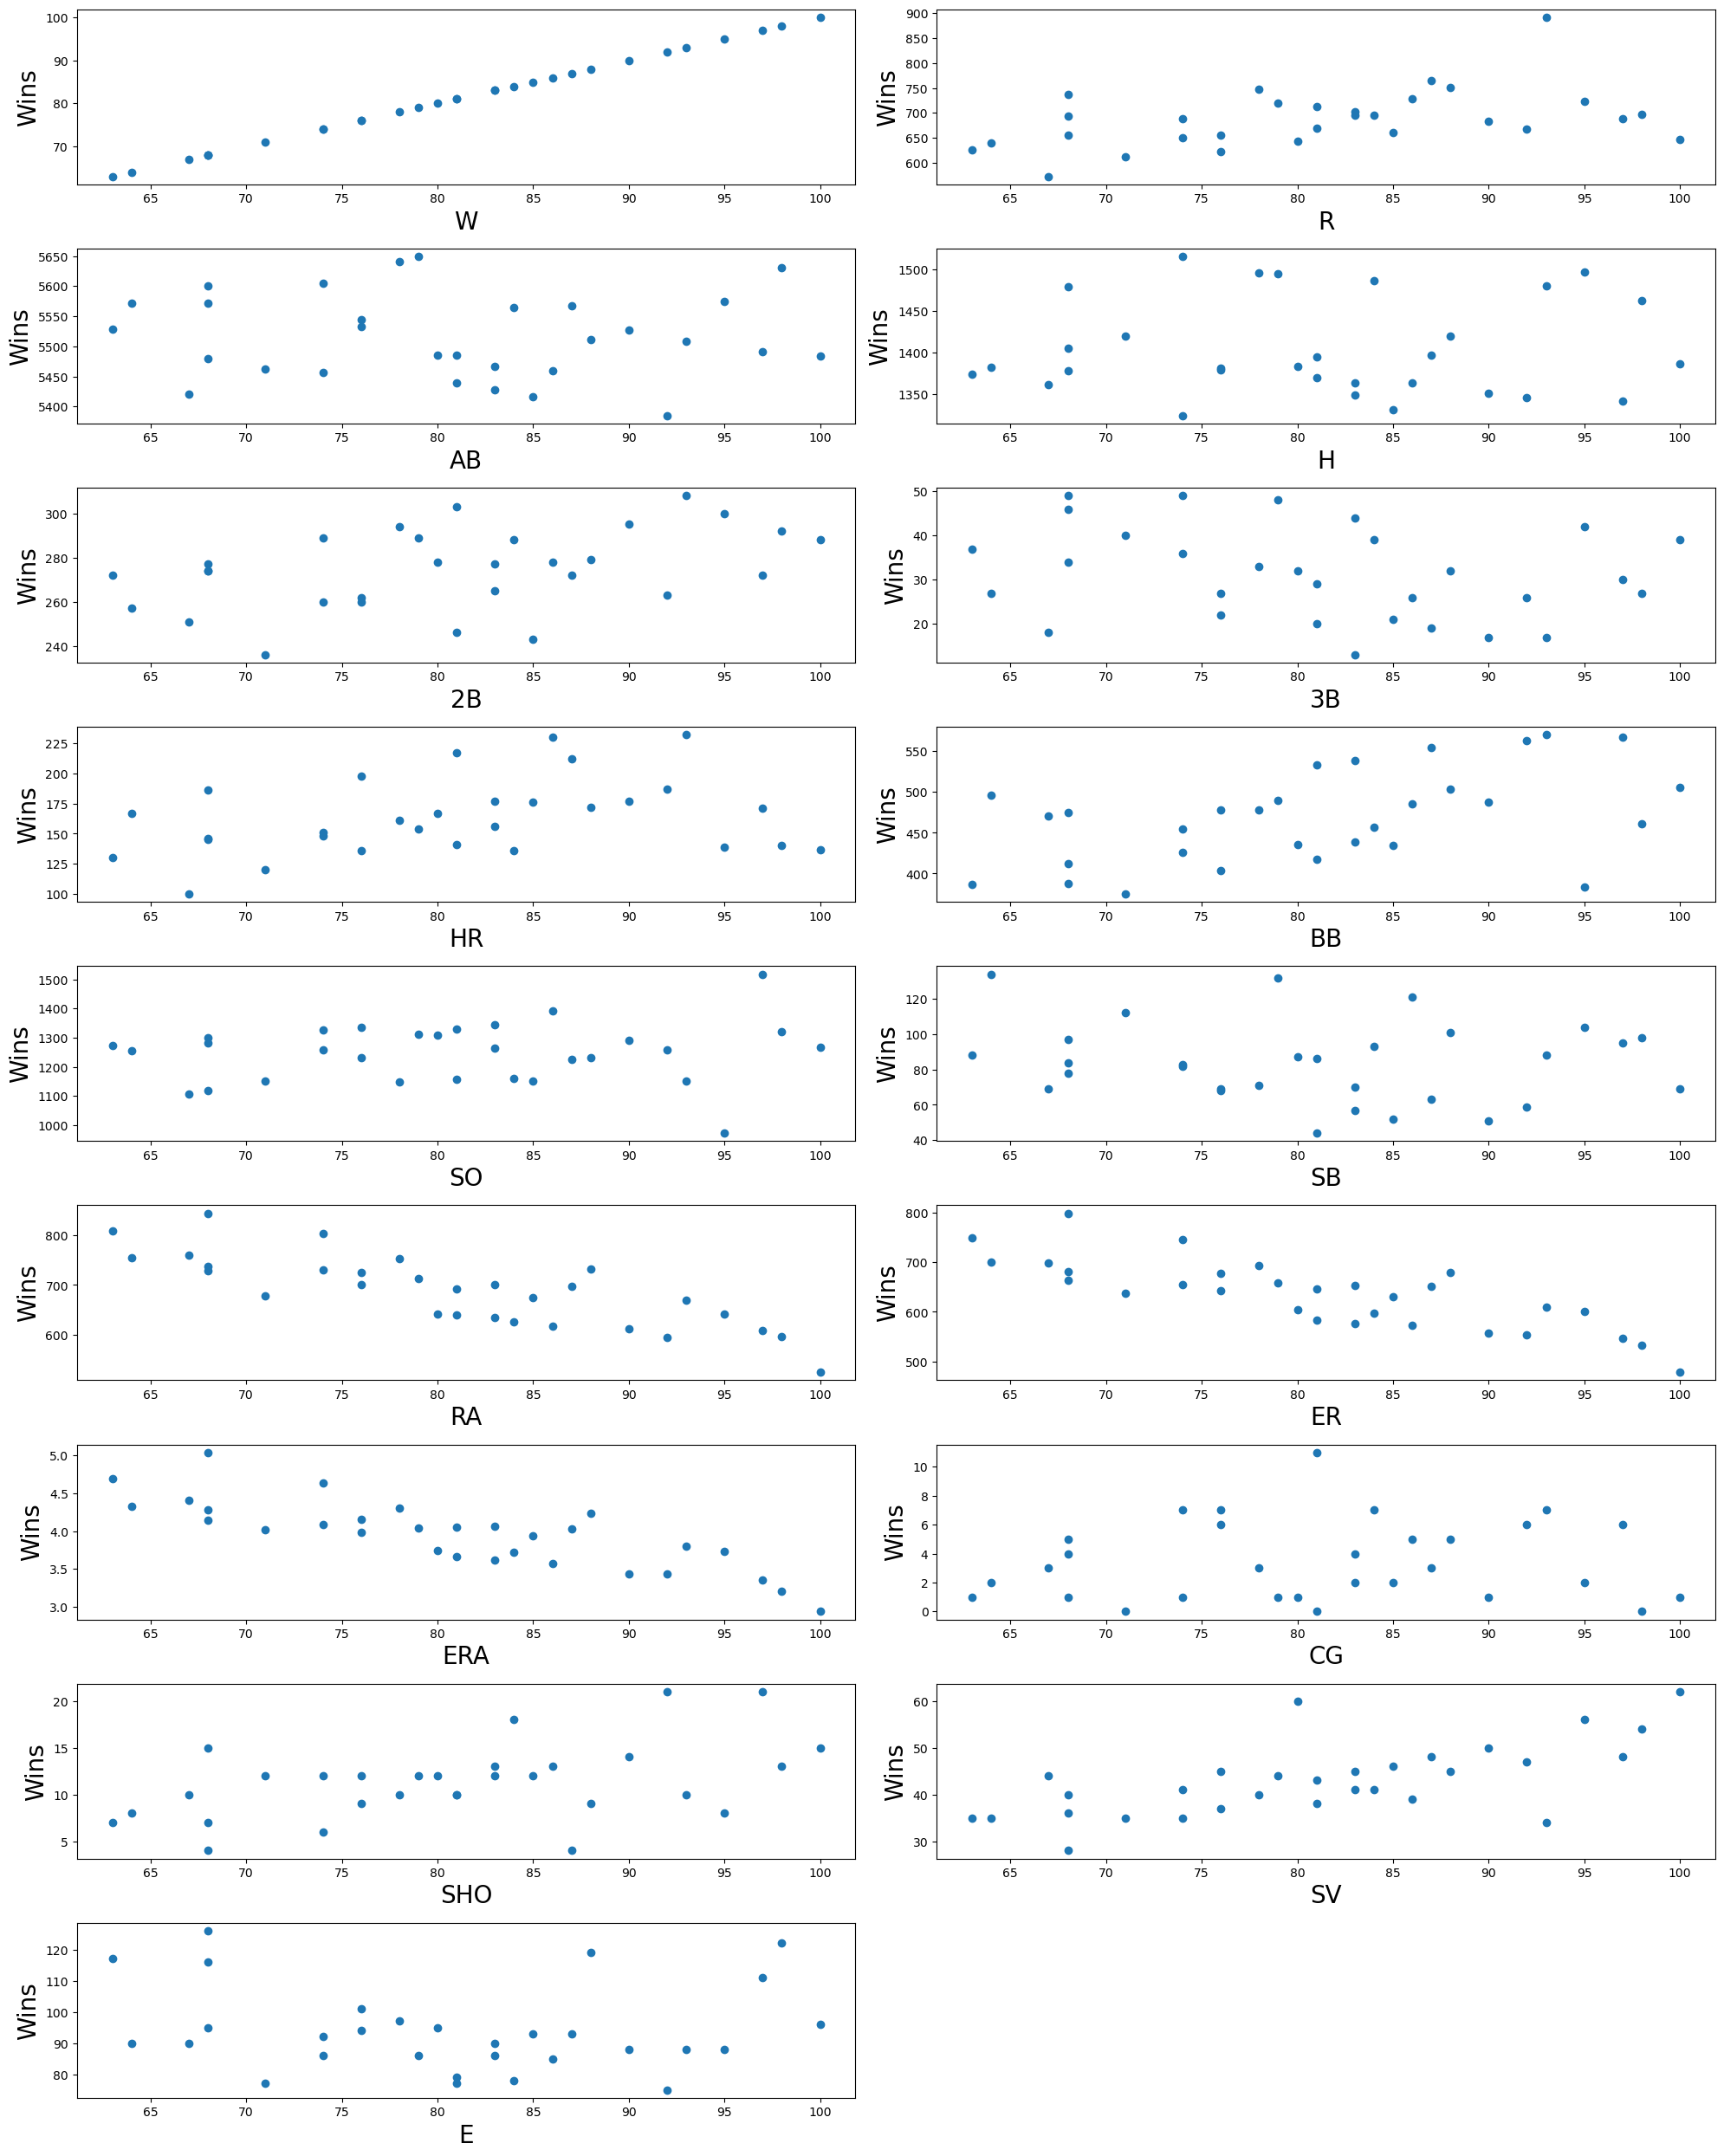

In [18]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 18:
        plt.subplot(9, 2, plotnumber)
        plt.scatter(data['W'], data[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Wins", fontsize=20)
    
    plotnumber += 1

plt.tight_layout()  
plt.show()


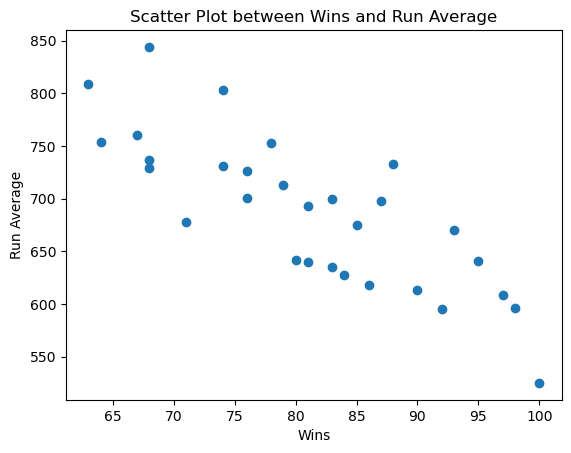

In [19]:
plt.scatter(data['W'], data['RA'])
plt.title('Scatter Plot between Wins and Run Average')
plt.xlabel('Wins')
plt.ylabel('Run Average')
plt.show()

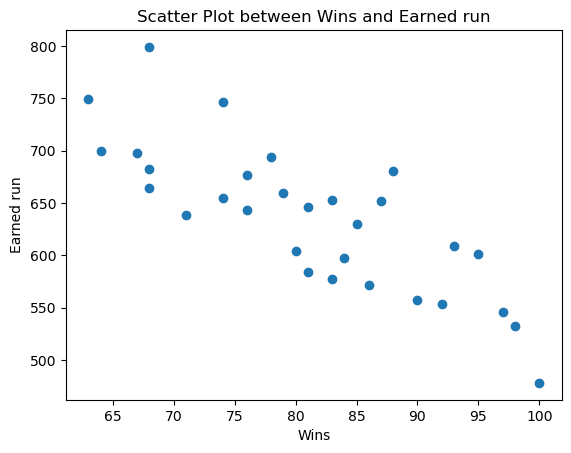

In [20]:
plt.scatter(data['W'], data['ER'])
plt.title('Scatter Plot between Wins and Earned run')
plt.xlabel('Wins')
plt.ylabel('Earned run')
plt.show()

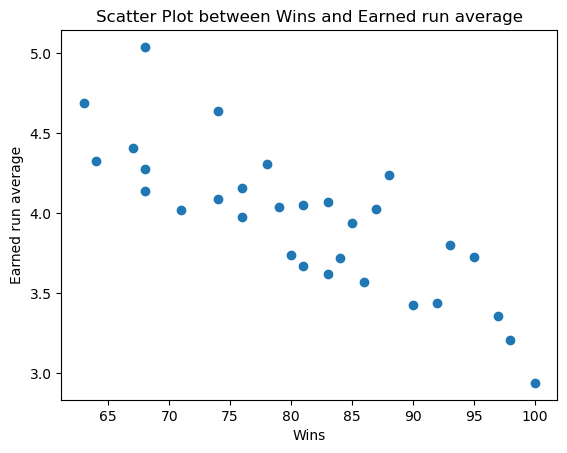

In [21]:
plt.scatter(data['W'], data['ERA'])
plt.title('Scatter Plot between Wins and Earned run average')
plt.xlabel('Wins')
plt.ylabel('Earned run average')
plt.show()

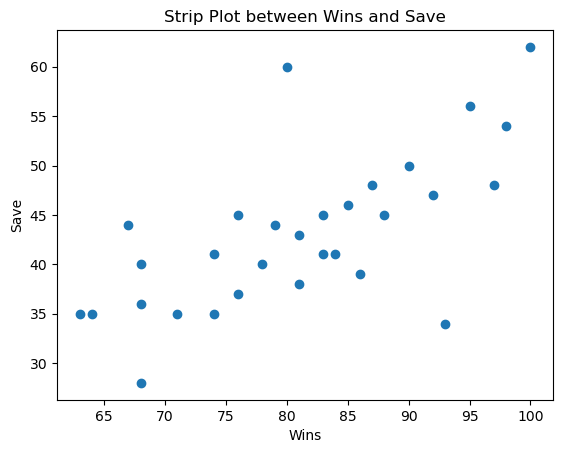

In [22]:
plt.scatter(data['W'], data['SV'])
plt.title('Strip Plot between Wins and Save')
plt.xlabel('Wins')
plt.ylabel('Save')
plt.show()

###### RA,ERA,ER have a negative relationship with Wins and save has positive relationship with Wins. 

<AxesSubplot:>

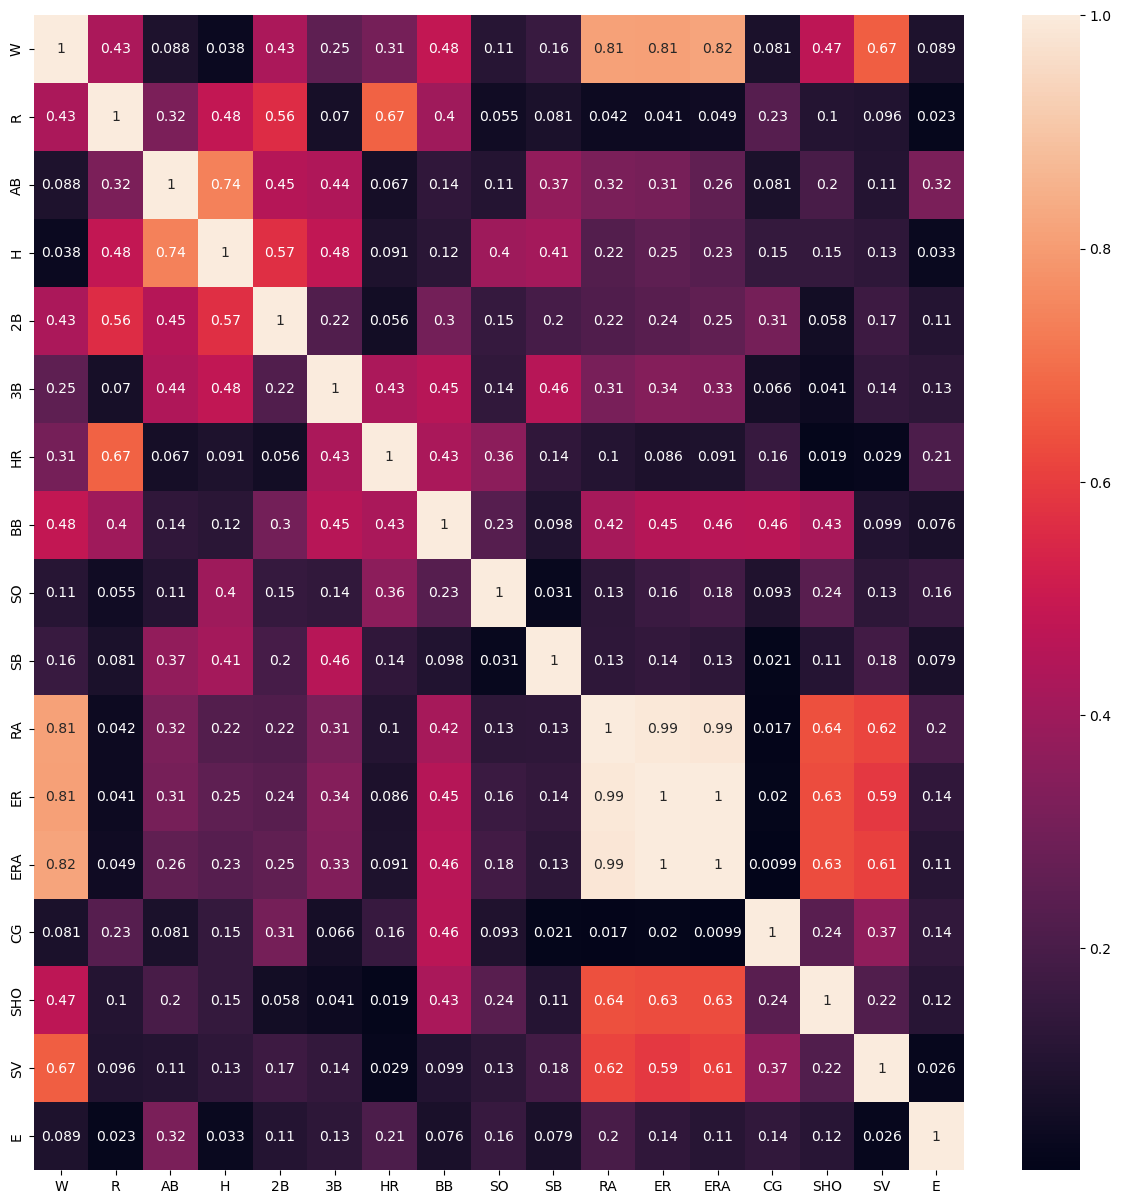

In [23]:
#Let's check correlation and multicollinerity
plt.figure(figsize=(15,15))

sns.heatmap(data.corr().abs(), annot=True)

In [24]:
w_corr = data.corr()
w_corr['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

###### Wins has strong negative correlation with ERA, RA,ER,3B and SB. and strong positive correlation with SV, BB, SHO, R,2B,HR and, SO. 
###### Wins has low correlation with E, AB, H, CG.
###### Here is the multicollinearity issue in ER and ERA. There is high correlation between these two
###### In this way, there is multicollinearity issue of ER with RA and also of ERA with RA 
###### So I will delete ER and RA from this, because it is 1% less correlated with Lable than ERA.
###### And I will also delete E, AB, H, CG because these are also low correlated with the label.

In [25]:
data = data.drop(columns=['ER','RA','H','CG','AB','E'])
data.head()

,W,R,2B,3B,HR,BB,SO,SB,ERA,SHO,SV
0,95,724,300,42,139,383,973,104,3.73,8,56
1,83,696,277,44,156,439,1264,70,4.07,12,45
2,81,669,303,29,141,533,1157,86,3.67,10,38
3,76,622,260,27,136,404,1231,68,3.98,9,37
4,74,689,289,49,151,455,1259,83,4.64,12,35


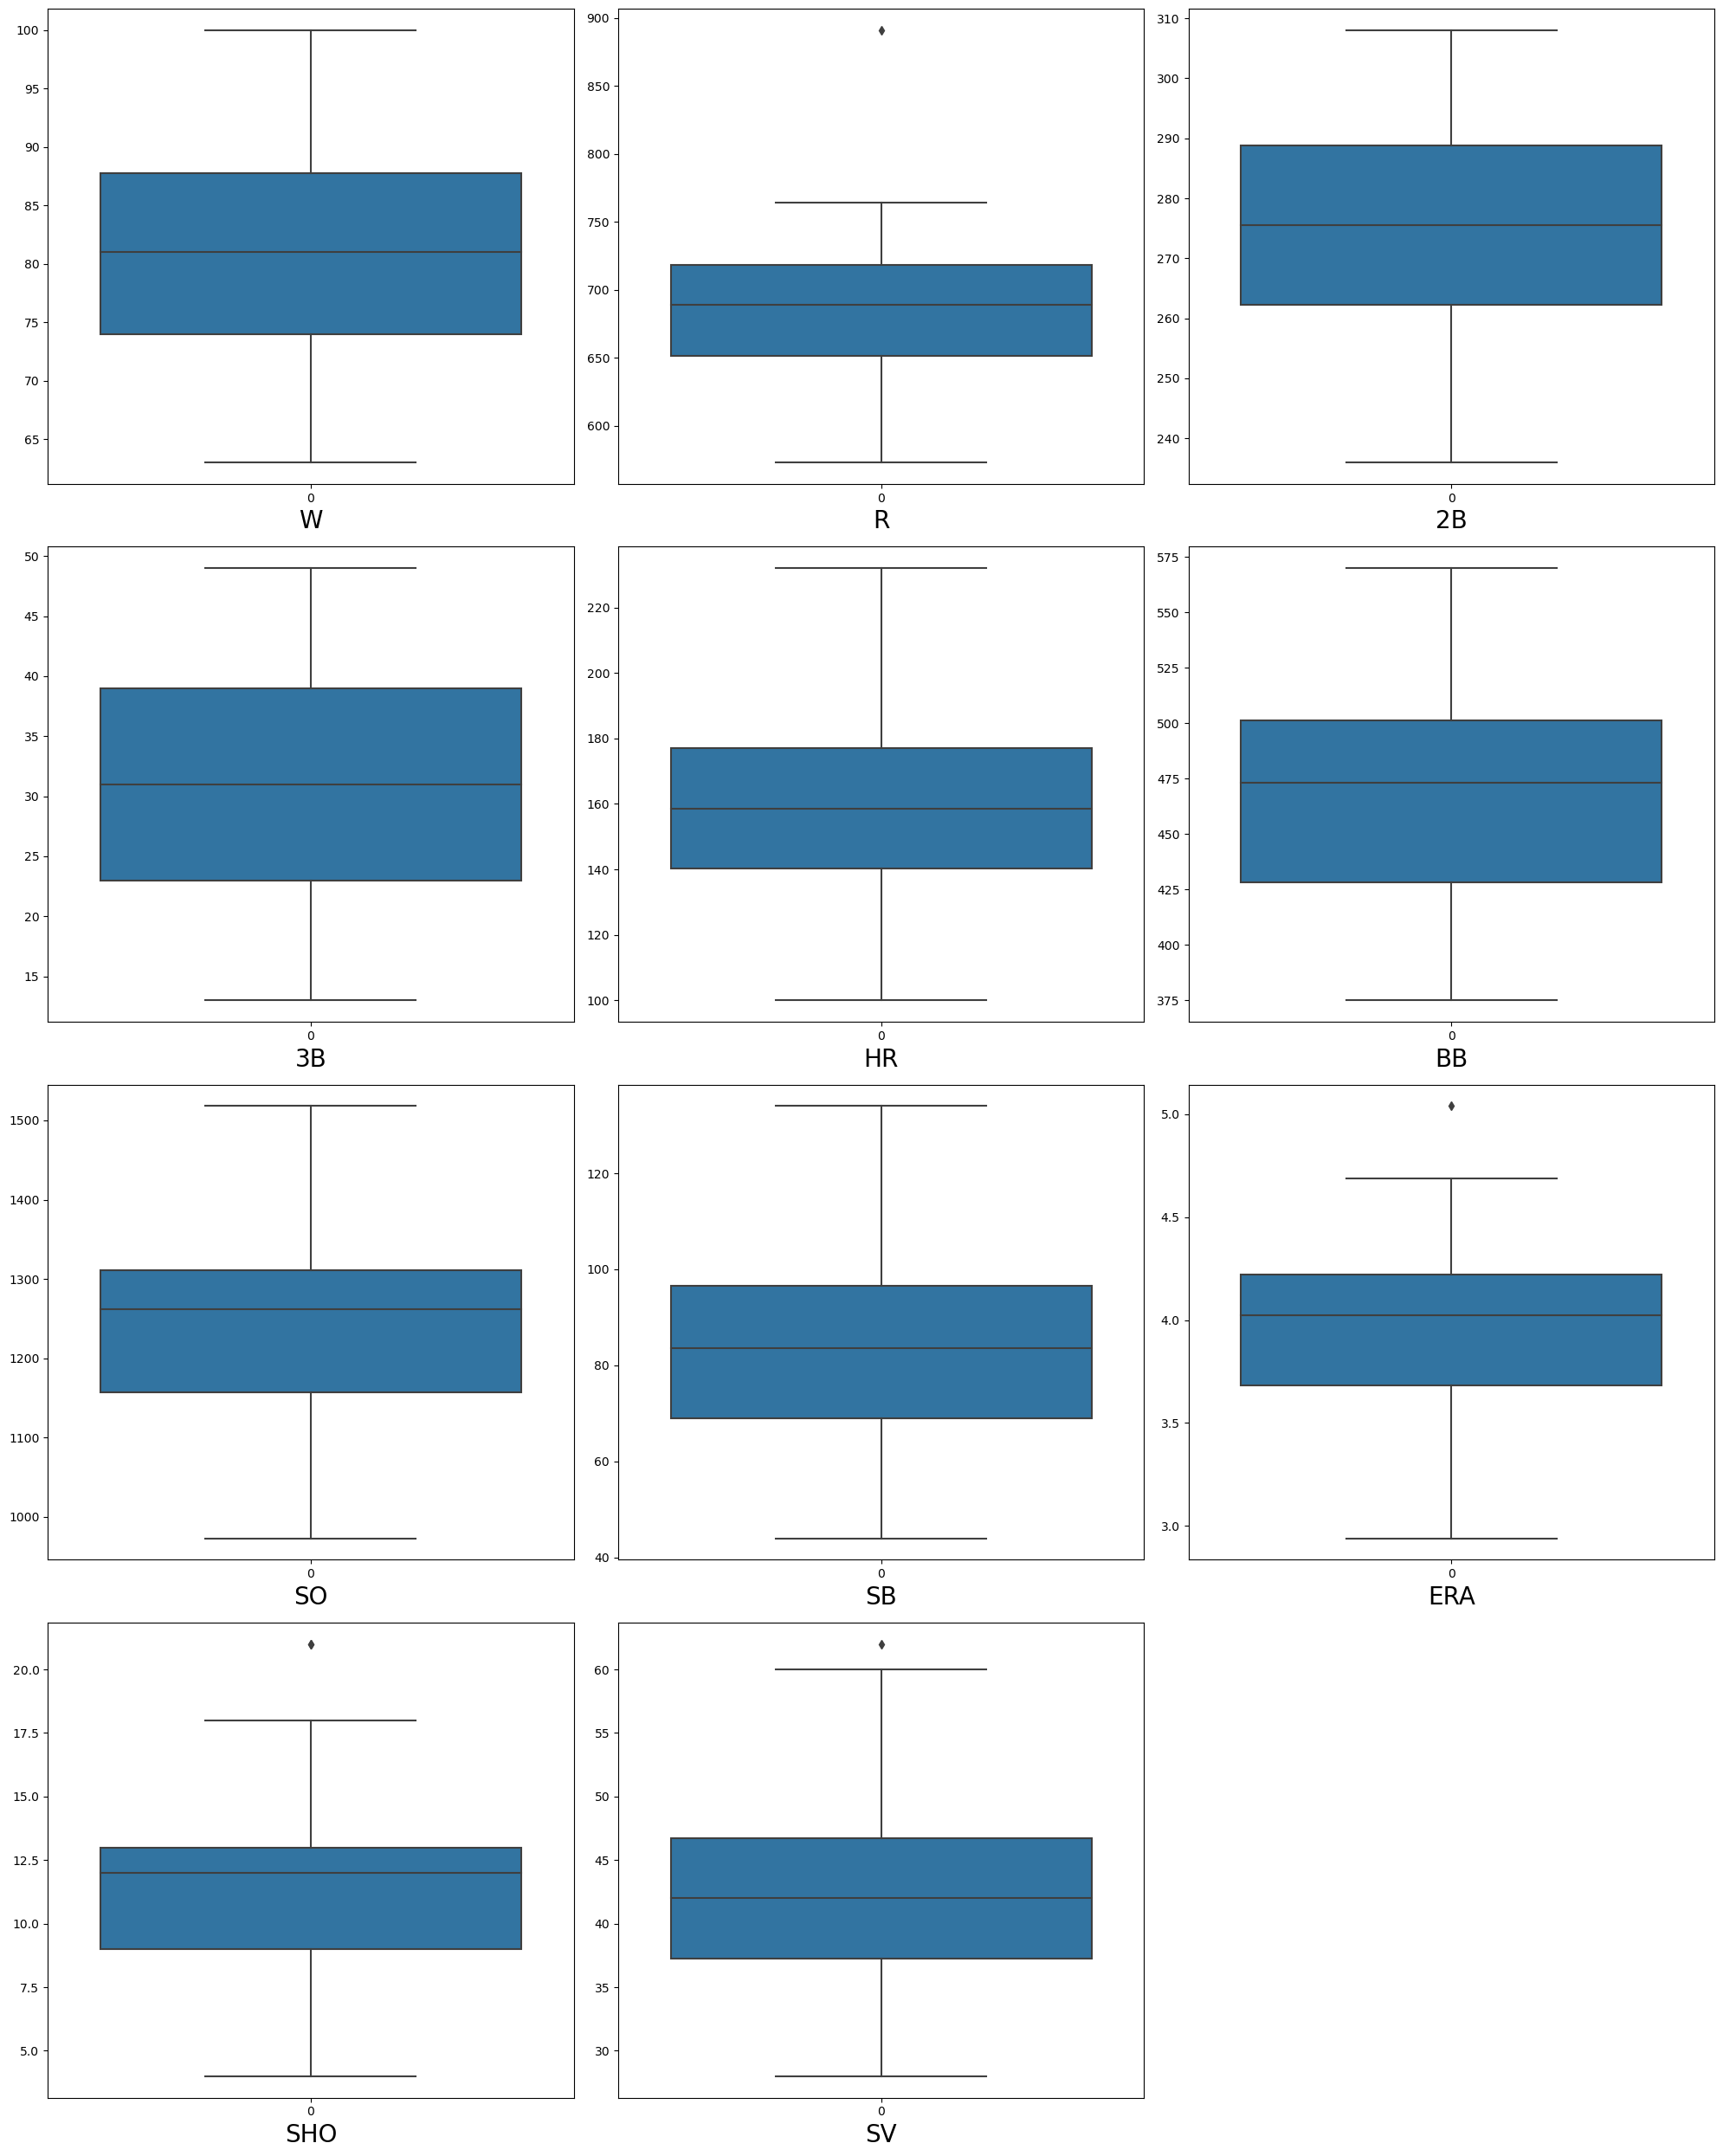

In [26]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data.columns:
    if graph <= 12:
        plt.subplot(4, 3, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

###### I think there are no outliers here.  There are some out layers but if we remove them then our data is already very less and then it will become less.

In [27]:
data.skew()

W      0.047089
R      1.200786
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
SHO    0.565790
SV     0.657524
dtype: float64

###### There is a lot of skewness in the R, HR, SHO, SV columns.

In [28]:
data_copy = data.copy(deep = True)   

In [29]:
data_copy['R'] = np.cbrt(data_copy['R'])
data_copy['HR'] = np.cbrt(data_copy['HR'])
data_copy['SHO'] = np.cbrt(data_copy['SHO'])
data_copy['SV'] = np.cbrt(data_copy['SV'])

In [30]:
data_copy.skew()

W      0.047089
R      0.892970
2B    -0.230650
3B     0.129502
HR     0.175310
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
SHO   -0.280283
SV     0.325143
dtype: float64

In [31]:
data_copy1 = data.copy(deep = True)
data_copy1['R'] = np.log1p(data_copy1['R'])
print(data_copy1.skew())

W      0.047089
R      0.744813
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
SHO    0.565790
SV     0.657524
dtype: float64


In [32]:
data_copy2 = data.copy(deep = True)
data_copy2['R'] = np.log(data_copy2['R'])
print(data_copy2.skew())

W      0.047089
R      0.744196
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
SHO    0.565790
SV     0.657524
dtype: float64


###### square root to all and log method for R best to remove skewness

In [33]:
data['R'] = np.log(data['R'])
data['HR'] = np.cbrt(data['HR'])
data['SHO'] = np.cbrt(data['SHO'])
data['SV'] = np.cbrt(data['SV'])

##### Let's divide feature and label.

In [34]:
x = data.drop('W',axis = 1)
y = data['W']

#### Scaled the features

In [35]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)

#### Identify multicollinearity using vif

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame()  

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns    



vif

,vif,Features
0,5.366230,R
1,2.630784,2B
2,2.656604,3B
3,4.683923,HR
4,2.320424,BB
5,1.702115,SO
6,1.425090,SB
7,3.750219,ERA
8,2.426910,SHO
9,1.954105,SV


In [38]:
x.drop('R',axis = 1, inplace = True) # R has too much VIF so I am removing it.

In [39]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)

In [40]:
vif = pd.DataFrame() 

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns

vif

,vif,Features
0,1.739186,2B
1,2.492967,3B
2,1.638844,HR
3,2.252514,BB
4,1.411874,SO
5,1.422797,SB
6,3.727109,ERA
7,2.356716,SHO
8,1.900946,SV


### Model bulding

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.20, random_state = 30)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n============Train Result================")
        mae = mean_absolute_error(y_train, y_pred)
        mse = mean_squared_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test)
        print("\n============Test Result================")
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


### DecisionTreeRegressor

In [44]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [45]:
metric_score(dtr,x_train,x_test,y_train,y_test,train=True)        
metric_score(dtr,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.0
Mean Squared Error :  0.0
R-squared (R2) Score :  1.0

============Test Result================
Mean Absolute Error :  8.333333333333334
Mean Squared Error :  96.0
R-squared (R2) Score :  0.38329764453961457


### AdaBoostRegressor

In [46]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [47]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)        
metric_score(ada,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.7370039682539679
Mean Squared Error :  1.1197658021541939
R-squared (R2) Score :  0.987592384009372

============Test Result================
Mean Absolute Error :  7.9444444444444455
Mean Squared Error :  77.24074074074076
R-squared (R2) Score :  0.5038068046633355


### KNeighborsRegressor

In [48]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [49]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)        
metric_score(knn,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  5.075
Mean Squared Error :  34.83833333333332
R-squared (R2) Score :  0.6139722601619761

============Test Result================
Mean Absolute Error :  9.466666666666669
Mean Squared Error :  104.32000000000001
R-squared (R2) Score :  0.32985010706638107


### LinearRegression

In [50]:
lin= LinearRegression() 
lin.fit(x_train, y_train)

LinearRegression()

In [51]:
metric_score(lin,x_train,x_test,y_train,y_test,train=True)        
metric_score(lin,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  3.180479496727578
Mean Squared Error :  14.436883671360873
R-squared (R2) Score :  0.840031452692152

============Test Result================
Mean Absolute Error :  4.245960931601508
Mean Squared Error :  31.909926717439106
R-squared (R2) Score :  0.7950111774040314


## cross-validation

In [52]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [53]:
lasso_regressor = LassoCV(alphas=None,max_iter=5)
lasso_regressor.fit(x_train, y_train)

LassoCV(max_iter=5)

In [54]:
alpha = lasso_regressor.alpha_
alpha

0.9526902643785652

In [55]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.9526902643785652)

In [56]:
lasso_reg.score(x_test, y_test)

0.729187925484116

##### LinearRegression model is not overfit

In [58]:
import pickle

In [59]:
pickle.dump(lin,open('BASEBALL','wb'))